# Titanic

The Titanic disaster is a maritime disaster that occurred on April 15, 1912. The RMS Titanic was a British passenger liner that sank during her maiden voyage from Southampton to New York City. More than 1,500 people died in the sinking, including passengers and crew members. It was the worst peacetime maritime disaster in history at the time of its occurrence, and remains the deadliest peacetime maritime disaster in modern times.

Suffice it to say, I will analyse a correlation between chances to survive and another properties such as sex, age and etc. All the rults will be presented in graphical and numerical views.

____________________________________________________________________________________________________________________

*Dataset description*

 - survival: Survival (0 = No, 1 = Yes)

 - pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

 - sex: Sex

 - Age: Age in years

 - sibsp: # of siblings / spouses aboard the Titanic

 - parch: # of parents / children aboard the Titanic

 - ticket: Ticket number

 - fare: Passenger fare

 - cabin: Cabin number

 - embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Importing relevant components

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data

In [18]:
train = pd.read_csv("train.csv", index_col = "PassengerId")
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- Sample size is 40% of the passengers (891 records out of 2,224)
- Around 38% samples survived (mean of binary class "Survived")
- No duplicate values in "Name" (count = unique)


### Survived people statistics

549
Histogram represents how many people survived (orange bin) and how many did not survive (blue bin)
As we can see 549 people did not survive that day, which is 61.62% of all amount of passengers in the data.


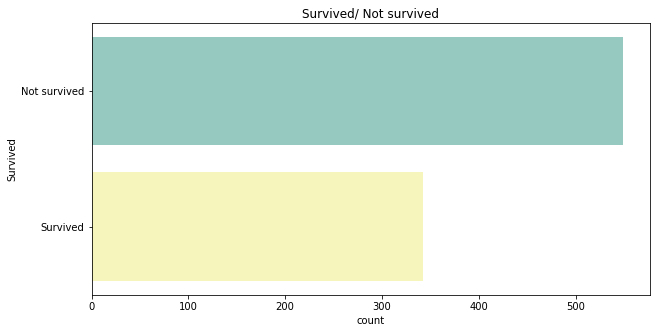

In [16]:
# Counting number of people, who did not survive
print(train[train['Survived']==0].count()['Survived'])

print('Histogram represents how many people survived (orange bin) and how many did not survive (blue bin)')
print('As we can see 549 people did not survive that day, which is 61.62% of all amount of passengers in the data.')

plt.figure(figsize = (10, 5))
sns.countplot(y = "Survived", data = train, palette="Set3")
plt.title("Survived/ Not survived")
plt.yticks([0, 1], ["Not survived", "Survived"])
plt.show()

### Statistics of survival according to Sex 

Amount of women:  314
Amount of men:  577
64.76% of all of passengers are men, which is significantly bigger than amount of women.

Histogram represents the ratio of gender differences:


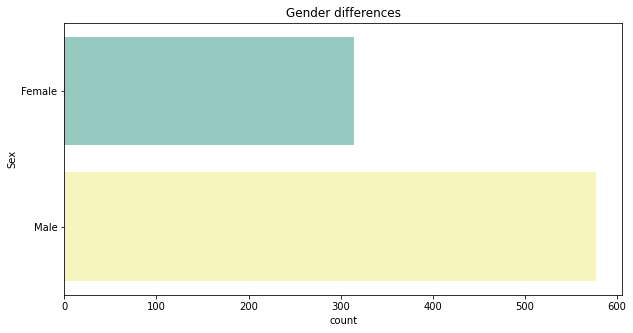

In [10]:
# Replacing categorical data (Female, Male) by binary data(0, 1). Necessary to further calculations.
train['Sex'] = train['Sex'].replace(['female','male'],[0,1])

# Counting number of people, who did not survive
print('Amount of women: ', train[train['Sex']==0].count()['Sex'])
print('Amount of men: ', train[train['Sex']==1].count()['Sex'])

print('64.76% of all of passengers are men, which is significantly bigger than amount of women.\n')
print('Histogram represents the ratio of gender differences:')

plt.figure(figsize = (10, 5))
sns.countplot(y = "Sex", data = train, palette="Set3")
plt.title("Gender differences")
plt.yticks([0, 1], ["Female", "Male"])
plt.show()

According to the statistics amount of men who did not survive is almost three times bigger then women
According to the statistics amount of survived women is almost four times bigger then to men


/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


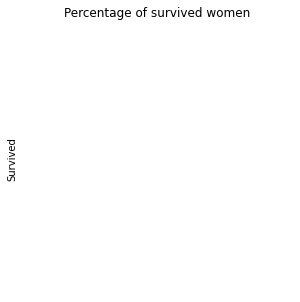

Pie represents how many women survived(blue part) and not survived(orange part)


/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


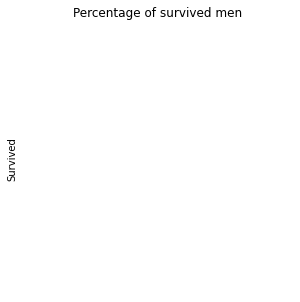

Pie represents how many men survived(orange part) and not survived(blue part)


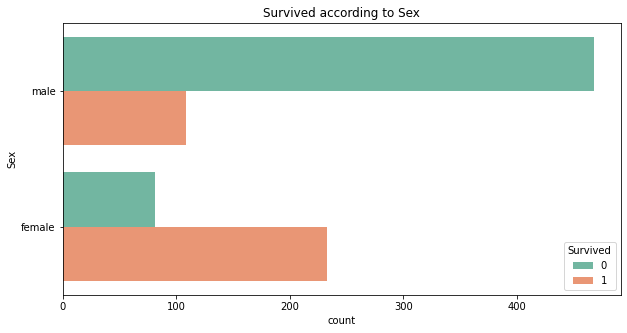

Histogram shows comparison between survived and not survived people according to Sex(class 0 - Female, class 1 - Male)


In [22]:
print('According to the statistics amount of men who did not survive is almost three times bigger then women')
print('According to the statistics amount of survived women is nearly four times bigger then to men')

plt.figure(figsize = (10, 5))
train.loc[train["Sex"] == 0, "Survived"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Percentage of survived women")
plt.show()

print('Pie represents how many women survived (blue part) and not survived(orange part)')

plt.figure(figsize = (10, 5))
train.loc[train["Sex"] == 1, "Survived"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Percentage of survived men")
plt.show()

print('Pie represents how many men survived(orange part) and not survived(blue part)')


plt.figure(figsize = (10, 5))
sns.countplot(y = "Sex", hue = "Survived", data = train, palette="Set2")
plt.title("Survived according to Sex")
plt.show()

print('Histogram shows comparison between survived and not survived people according to Sex(class 0 - Female, class 1 - Male)')

### Statistics of survival according to number of Spouses, siblings and children

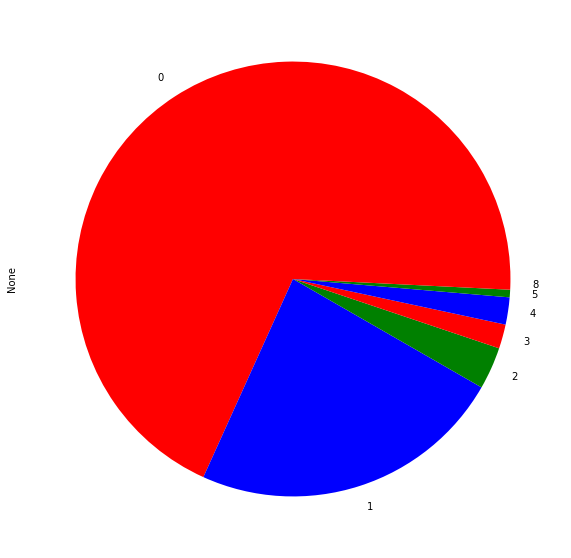

Amount of people who traveled alone:  608 , which is 68.24%
Amount of people who traveled with one sibling or spouse:  209 , which is 23.46%
Amount of people who traveled with more than one siblings or spouses:  74 , which is 8.31%
From pie we can see that majority of people traveled without siblings or spouses


In [15]:
# Comparing number of siblings and spouses

fig, ax1 = plt.subplots(ncols=1, figsize=(20, 10))

train.groupby('SibSp').size().plot(kind='pie',
                                   textprops={'fontsize': 10},
                                   colors=['r', 'b', 'g'], 
                                   ax=ax1)

plt.show()

alone = train[train['SibSp']==0].count()['SibSp']
one_sibling = train[train['SibSp']==1].count()['SibSp']
more_sibling = train[train['SibSp']>1].count()['SibSp']

print('Amount of people who traveled alone: ', alone,', which is 68.24%')
print('Amount of people who traveled with one sibling or spouse: ', one_sibling ,', which is 23.46%')
print('Amount of people who traveled with more than one siblings or spouses: ', more_sibling ,', which is 8.31%')

print('From pie we can see that majority of people traveled without siblings or spouses')

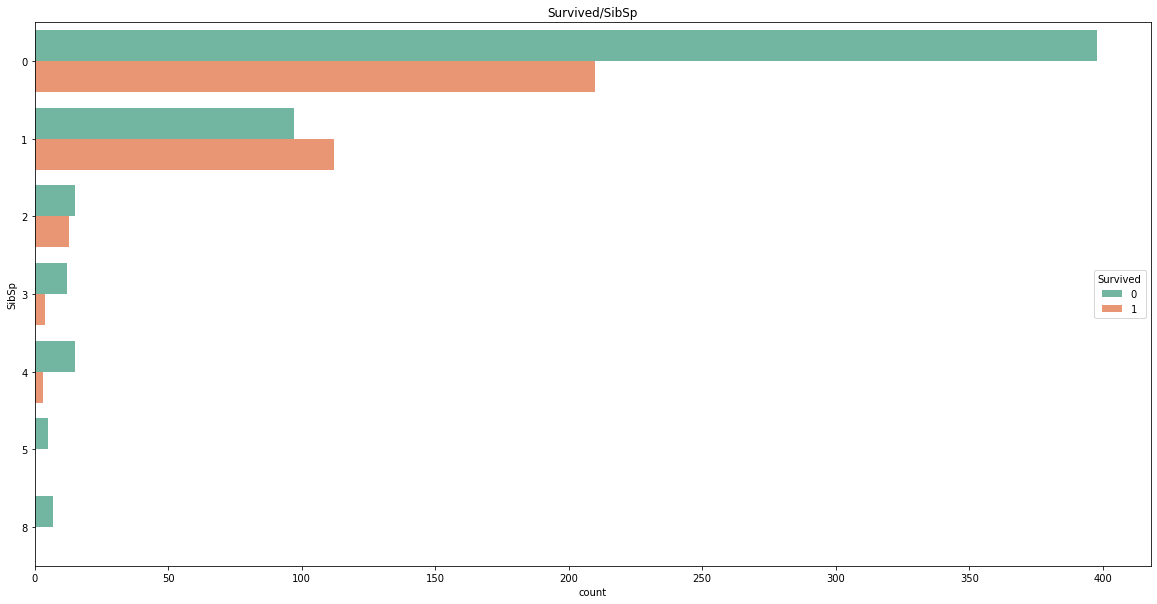

Since the records are incomplete, it is possible that the data on passengers who traveled with more than one sibling/spouse have not been preserved, or there really were few such passengers.
For simplicity, lets focus on majority of passengers
Looking at the ratio of passengers who traveled alone and passengers who traveled with one sibling/spouse, it seems that traveling alone lowered the chances of survival by almost half.


In [44]:
# Let's see at the correlation between the number of siblings and the chances of survival
plt.figure(figsize = (20, 10))
sns.countplot(y = "SibSp", hue = "Survived", data = train, palette="Set2")
plt.title("Survived/SibSp")
plt.show()

print('Since the records are incomplete, it is possible that the data on passengers who traveled with more than one sibling/spouse have not been preserved, or there really were few such passengers.') 
print('For simplicity, lets focus on majority of passengers')
print('Looking at the ratio of passengers who traveled alone and passengers who traveled with one sibling/spouse, it seems that traveling alone lowered the chances of survival by almost half.')

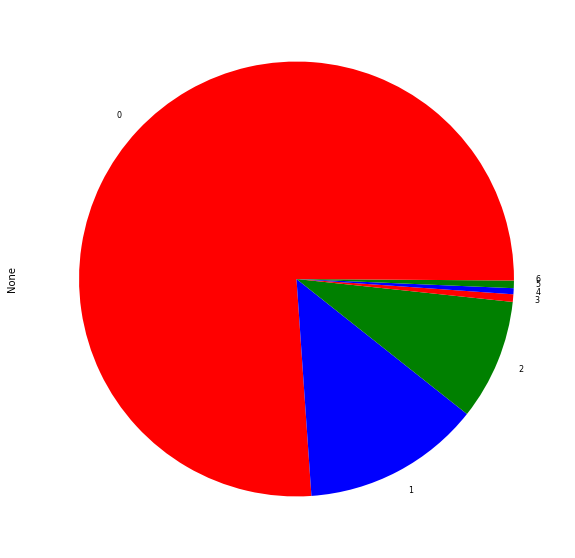

Amount of people who traveled alone:  678 , which is 76.09%
Amount of people who traveled with one parent or child:  209 , which is 13.24%
Amount of people who traveled with more than one parent or children:  74 , which is 10.66%
From pie we can see that majority of people traveled withoud children or parents


In [65]:
# Comparing number of parents and children

fig, ax1 = plt.subplots(ncols=1, figsize=(20, 10))

train.groupby('Parch').size().plot(kind='pie',textprops={'fontsize': 8},
                                  colors=['r', 'b', 'g'], ax=ax1)

plt.show()

alone = train[train['Parch']==0].count()['Parch']
one = train[train['Parch']==1].count()['Parch']
more_then_one = train[train['Parch']>1].count()['Parch']

print('Amount of people who traveled alone: ', alone,', which is 76.09%')
print('Amount of people who traveled with one parent or child: ', one_sibling ,', which is 13.24%')
print('Amount of people who traveled with more than one parent or children: ', more_sibling ,', which is 10.66%')

print('From pie we can see that majority of people traveled withoud children or parents')


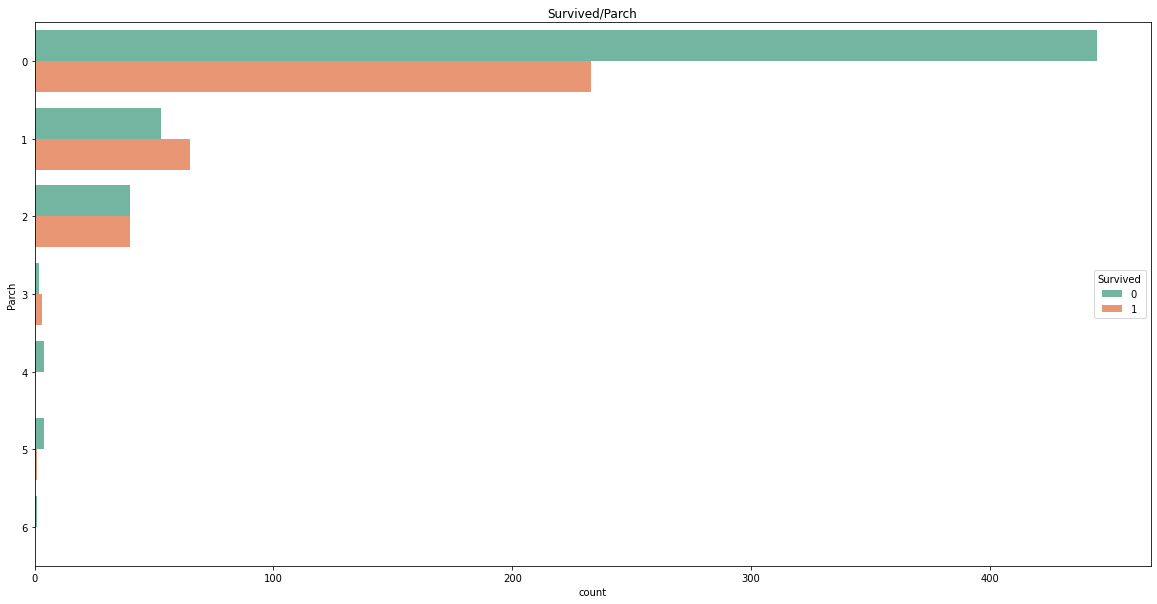

Since the records are incomplete, it is possible that the data on passengers who traveled with more than one parent/children have not been preserved, or there really were few such passengers.
For simplicity, lets focus on majority of passengers
Looking at the ratio of passengers who traveled alone and passengers who traveled with one parent or child, it seems that traveling alone lowered the chances of survival by almost half.


In [67]:
# Let's see at the correlation between the number of parents/children and the chances of survival

plt.figure(figsize = (20, 10))
sns.countplot(y = "Parch", hue = "Survived", data = train, palette="Set2")
plt.title("Survived/Parch")
plt.show()


print('Since the records are incomplete, it is possible that the data on passengers who traveled with more than one parent/children have not been preserved, or there really were few such passengers.') 
print('For simplicity, lets focus on majority of passengers')
print('Looking at the ratio of passengers who traveled alone and passengers who traveled with one parent or child, it seems that traveling alone lowered the chances of survival by almost half.')

### Age

The average age of passengers was 18-30 years


<AxesSubplot:>

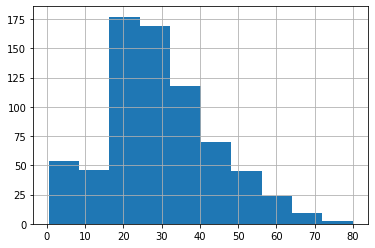

In [71]:
# Let's see distribution of the ages, 
# according to previous graphs, it seems like most part of passengers were traveling alone or probably single

print('The average age of passengers was 18-30 years')

train['Age'].hist()

Each hist represents Survived (class 1) and Not survived (class 0) groups
within each group there is a distribution of ages of passengers

It seems that the age of most of non-survivors was in the range of 20-40 years.
But according to second histogram, the age of most of survivors was also in the range of 20-40 years.
The fact that everybody on the board tried to save children is true, because looking at the second graph we can say that children had very high chances of survival 


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

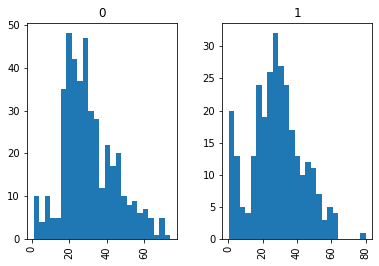

In [80]:
print('Each hist represents Survived (class 1) and Not survived (class 0) groups')
print('within each group there is a distribution of ages of passengers\n')

print('It seems that the age of most of non-survivors was in the range of 20-40 years.')
print('But according to second histogram, the age of most of survivors was also in the range of 20-40 years.')

print('The fact that everybody on the board tried to save children is true, because looking at the second graph we can say that children had very high chances of survival ')

train['Age'].hist(by=train['Survived'], bins=25)



### Pclass


In [84]:
# Comparison of the number of passengers with tickets of different classes

print('Number of passengers with first class tickets: ', train['Pclass'].value_counts(ascending=False)[1])
print('Number of passengers with second class tickets: ', train['Pclass'].value_counts(ascending=False)[2])
print('Number of passengers with third class tickets: ', train['Pclass'].value_counts(ascending=False)[3])

print('Majority of passengers bought tickets with cheapest price(third class)')

Number of passengers with first class tickets:  216
Number of passengers with second class tickets:  184
Number of passengers with third class tickets:  491
Majority of passengers bought tickets with cheapest price(third class)


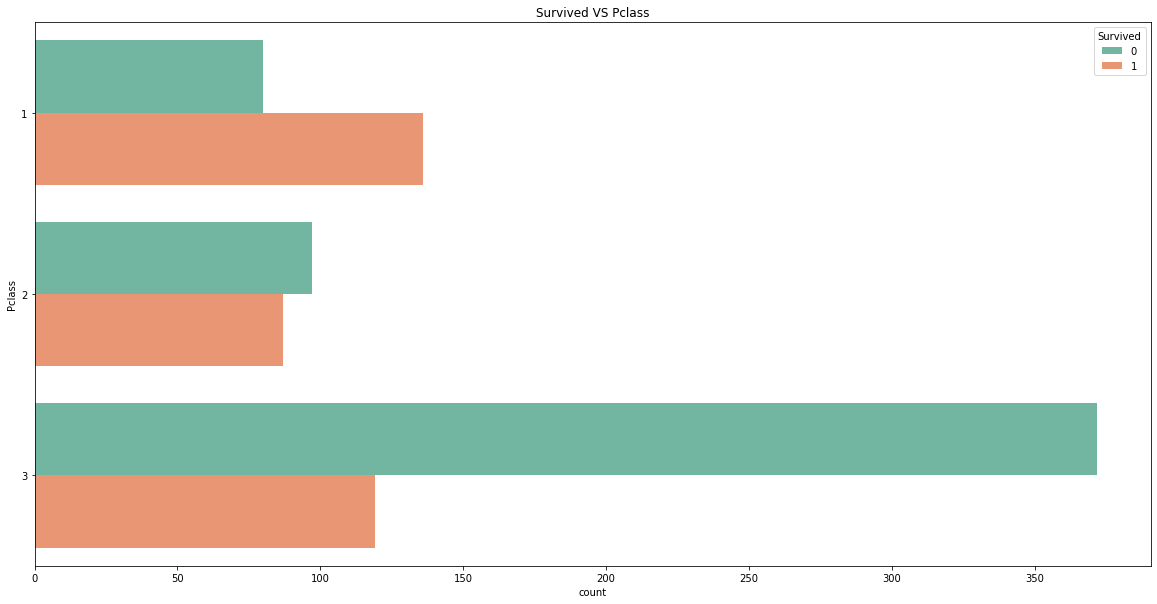

Judging by the histogram, most of the passengers who not survived are third-class ticket holders.
Such passengers had three times less chances of survival.
Perhaps the reason for this is that the owners of expensive tickets lived in the upper cabins and they had more time to escape, or probably such people were rich and privileged.


In [88]:
# Let's look at whether the ticket price affected the chances of survival
plt.figure(figsize = (20, 10))
sns.countplot(y = "Pclass", hue = "Survived", data = train, palette="Set2")
plt.title("Survived VS Pclass")
plt.show()


print('Judging by the histogram, most of the passengers who not survived are third-class ticket holders.')
print('Such passengers had three times less chances of survival.')
print('Perhaps the reason for this is that the owners of expensive tickets lived in the upper cabins and they had more time to escape, or probably such people were rich and privileged.')

In [98]:
# Let's count percentage of passengers who survived according to their tickets.
print(round(train[['Sex', 'Pclass','Survived']].\
                       groupby(['Pclass', 'Sex']).mean()*100,1))

print('As proof that a higher ticket class increased the chances of survival. ')
print('More then 90% percent of Class 1 and 2 ticket holders survived, ')
print('which is twice as much as the statistics for third-class ticket holders\n')


print('Of course, it is mandatory to emphasize that most of the survivors are women.')
print('Also, do not forget that these statistics are not accurate enough, since most of the records about ticket holders have been lost.\n\n')

print('There we can see the number of passengers records for each class of tickets: \n\n', train[['Sex', 'Pclass','Survived']].groupby \
                       (['Pclass', 'Sex']).count())

            Survived
Pclass Sex          
1      0        96.8
       1        36.9
2      0        92.1
       1        15.7
3      0        50.0
       1        13.5
As proof that a higher ticket class increased the chances of survival. 
More then 90% percent of Class 1 and 2 ticket holders survived, 
which is twice as much as the statistics for third-class ticket holders

Of course, it is mandatory to emphasize that most of the survivors are women.
Also, do not forget that these statistics are not accurate enough, since most of the records about ticket holders have been lost.


There we can see the number of passengers records for each class of tickets: 

             Survived
Pclass Sex          
1      0          94
       1         122
2      0          76
       1         108
3      0         144
       1         347


In [104]:
# Let's look at correlation between classes of tickets, ages and chances of survival

print('Survived passengers with Pclass 1 above Age 60:', round(len(train[(train['Pclass']==1) & \
    (train['Age']>59) & (train['Survived']==True)])/len(train[(train\
    ['Pclass']==1) & (train['Age']>59)])*100, 1), '%')

print('Survived passengers with Pclass 2 above Age 60:', round(len(train[(train['Pclass']==2) & \
    (train['Age']>59) & (train['Survived']==True)])/len(train[(train \
    ['Pclass']==2) & (train['Age']>59)])*100, 1), '%')

print('Survived passengers with Pclass 3 above Age 60:', round(len(train[(train['Pclass']==3) & \
    (train['Age']>59) & (train['Survived']==True)])/len(train[(train \
    ['Pclass']==3) & (train['Age']>59)])*100, 1), '%')

print('\nSurvived passengers with Pclass1 between 20-30 Age:',round(len(train[(train['Pclass']==1) \
    &(train['Age']>19) & (train['Age']<31) & (train['Survived']==True)])/len( \
    train[(train['Pclass']==1) & (train['Age']>19) \
    & (train['Age']<31)])*100, 1),'%')

print('Survived passengers with Pclass2 between 20-30 Age:',round(len(train[(train['Pclass']==2) \
    &(train['Age']>19) & (train['Age']<31) &(train['Survived']==True)])/len( \
    train[(train['Pclass']==2)&(train['Age']>19) \
    &(train['Age']<31)])*100, 1),'%')

print('Survived passengers with Pclass3 between 20-30 Age:',round(len(train[(train['Pclass']==3) \
    &(train['Age']>19) & (train['Age']<31) &(train['Survived']==True)])/len( \
    train[(train['Pclass']==3) & (train['Age']>19) \
    &(train['Age']<31)])*100, 1),'%')

print('\nSurvived passengers with Pclass 1 under Age 20:', round(len(train[(train['Pclass']==1) & \
    (train['Age']<=19) & (train['Survived']==True)])/len(train[(train\
    ['Pclass']==1) & (train['Age']<=19)])*100, 1), '%')

print('Survived passengers with Pclass 2 under Age 20:', round(len(train[(train['Pclass']==2) & \
    (train['Age']<=19) & (train['Survived']==True)])/len(train[(train \
    ['Pclass']==2) & (train['Age']<=19)])*100, 1), '%')

print('Survived passengers with Pclass 3 under Age 20:', round(len(train[(train['Pclass']==3) & \
    (train['Age']<=19) & (train['Survived']==True)])/len(train[(train \
    ['Pclass']==3) & (train['Age']<=19)])*100, 1), '%')

print('\n\nJudging by the statistics, elderly passengers had the least chance of survival, regardless of the ticket class.')
print('The highest chances of survival were for first class ticket holders aged betweeb 20-30 years and the children with tickets of first and second class\n')
print('Unfortunately, the holders of third tickets, even children, had the worst chances of survival')

Survived passengers with Pclass 1 above Age 60: 29.4 %
Survived passengers with Pclass 2 above Age 60: 25.0 %
Survived passengers with Pclass 3 above Age 60: 20.0 %

Survived passengers with Pclass1 between 20-30 Age: 72.5 %
Survived passengers with Pclass2 between 20-30 Age: 41.0 %
Survived passengers with Pclass3 between 20-30 Age: 22.6 %

Survived passengers with Pclass 1 under Age 20: 81.0 %
Survived passengers with Pclass 2 under Age 20: 74.3 %
Survived passengers with Pclass 3 under Age 20: 33.3 %


Judging by the statistics, elderly passengers had the least chance of survival, regardless of the ticket class.
The highest chances of survival were for first class ticket holders aged betweeb 20-30 years and the children with tickets of first and second class
Unfortunately, the holders of third tickets, even children, had the worst chances of survival


### Summury

From the above, the following conclusions can be drawn:

Despite the fact that there were almost twice as many men on the ship as women, more women managed to escape. According to statistics, the number of men who did not survive is almost three times greater than women. Consequently, it can be assumed that the men of that time were full of valor and honor in front of women.

The same cultural aspect can be attributed to a large percentage of survival among children and adolescents. The male passengers probably bravely risked and sacrificed their lives to save the young.

The chances of survival plummeted if someone traveled alone. Quite an interesting observation, most likely related to a kind of sense of responsibility to a loved one.

Demographic analysis showed that the age of the majority of survivors was also in the range of 20-40 years. These data once again confirm that the children had very high chances of survival.

There is a close relationship between the cost of the tariff and survival. The more the passenger pays, the higher his chances of survival will be. This indicator is a possible proof of inequality in society. A rich man had a chance to buy a cabin above the floor, closer to the lifeboat. Based on the histogram, most of the passengers who did not survive were third-class ticket holders. Such passengers were three times less likely to survive.

Also, do not forget that these statistics are not accurate enough since most of the records of ticket holders have been lost.

The achieved accuracy clearly demonstrates that if you get to know and analyze the data properly, you may draw hypotheses that will aid in the implementation of the prediction rule based only on logical conclusions.